# Validating Model - Ad. Sale Prediction from Existing customer | Logistic Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("C:/Users/rushi/OneDrive/Desktop/Projects DS,ML,DL,AI/GitHub Uploded Resporatory/Pantech/Validating Model - Ad. Sale Prediction from Existing customer  Logistic Regression/DigitalAd_dataset.csv")

In [3]:
# Summarize Dataset

In [4]:
print(dataset.shape)
print(dataset.head())

(400, 3)
   Age  Salary  Status
0   18   82000       0
1   29   80000       0
2   47   25000       1
3   45   26000       1
4   46   28000       1


In [5]:
# Segregate Dataset into X and Y

In [6]:
X = dataset.iloc[:,:-1].values
X[:10]

array([[   18, 82000],
       [   29, 80000],
       [   47, 25000],
       [   45, 26000],
       [   46, 28000],
       [   48, 29000],
       [   45, 22000],
       [   47, 49000],
       [   48, 41000],
       [   45, 22000]], dtype=int64)

In [7]:
Y = dataset.iloc[:,-1]
Y[:10]

0    0
1    0
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Status, dtype: int64

In [8]:
# splitting Dataset into Train and Test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [10]:
# feature Scalling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Training

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [14]:
# Prediction 

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

# Evaluating Model

In [17]:
# Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion Matrix: ")
print(cm)

confusion Matrix: 
[[61  0]
 [20 19]]


In [19]:
# Accuracy Score

In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy: 80.0%


# Receiver Operating Curve - ROC Curve

No Skill: ROC AUC=50.000
Logistic Skill: ROC AUC=92.980


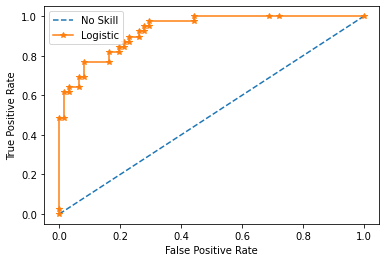

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

nsProbability = [0 for _ in range(len(y_test))]
lsProbability = model.predict_proba(X_test)

# Keep probabilities for the positive outcome only
lsProbability = lsProbability[:, 1]

# Calculate Scores
nsAUC = roc_auc_score(y_test, nsProbability)
lrAUC = roc_auc_score(y_test, lsProbability)

# Summarize Scores
print('No Skill: ROC AUC=%.3f' % (nsAUC*100))
print('Logistic Skill: ROC AUC=%.3f' % (lrAUC*100))

# calculate roc curves
nsFP, nsTP, _ = roc_curve(y_test, nsProbability)
lrFP, lrTP, _ = roc_curve(y_test, lsProbability)

# Plot the roc curve for the model
plt.plot(nsFP, nsTP, linestyle='--', label='No Skill')
plt.plot(lrFP, lrTP, marker='*', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
result = cross_val_score(model, X, Y, cv=kfold)
print("CROSS VALIDATION SCORE: %.2f%%" % (result.mean()*100.0))

# Stratifield K-fold Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3, random_state=100, shuffle=True)
model_skfold = LogisticRegression()
result_skfold = cross_val_score(model_skfold, X, Y, cv=skfold)
print("STATIFIELD K-FOLD SCORE: %.2f%%" % (result_skfold.mean()*100.0))

STATIFIELD K-FOLD SCORE: 64.25%


# Cummulative Accuracy Profile(CAP) Curve

100
39


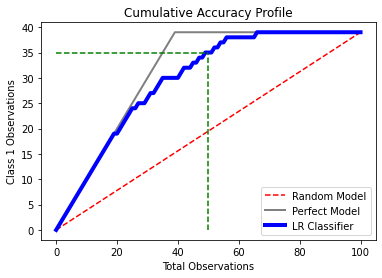

In [44]:
total = len(y_test)
print(total)
class_1_count = np.sum(y_test)
print(class_1_count)
class_0_count = total - class_1_count
plt.plot([0, total], [0, class_1_count], c='r', linestyle='--', label='Random Model')

plt.plot([0, class_1_count, total],
         [0, class_1_count, class_1_count],
         c = 'grey',
         linewidth = 2,
         label = 'Perfect Model')

probs = model.predict_proba(X_test)
probs = probs[:, 1]
model_y = [y for _, y in sorted(zip(probs, y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total + 1)

plt.plot(x_values,
         y_values,
         c = 'b',
         label = 'LR Classifier',
         linewidth = 4)
index = int((50*total / 100))

## 50% Vertical line from x-axis
plt.plot([index, index], [0, y_values[index]], c = 'g', linestyle='--')

## Horizontal line to y-axis from prediction model
plt.plot([0, index],[y_values[index], y_values[index]], c = 'g', linestyle='--')

class_1_observed = y_values[index] * 100 / max(y_values)
plt.xlabel('Total Observations')
plt.ylabel('Class 1 Observations')
plt.title('Cumulative Accuracy Profile')
plt.legend(loc = 'lower right')